In [ ]:
# Displaying 2011 census country of birth data for the new 2022 wards.

In [1]:
# Dependencies
!pip install geopandas mapclassify

     |████████████████████████████████| 1.0 MB 28.8 MB/s 
     |████████████████████████████████| 15.4 MB 49.1 MB/s 
     |████████████████████████████████| 6.3 MB 37.5 MB/s 


In [2]:
import os

import geopandas as gpd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import drive

Data
==


GDrive mount
--

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
project_dir = '/content/gdrive/MyDrive/WardProfiles'
oa_dir = f"{project_dir}/boundaries/oa"
ward_dir = f"{project_dir}/boundaries/2022_wards"
cob_dir = f"{project_dir}/country_of_birth"

# Outputs
out_dir = f"{project_dir}/country_of_birth/maps"

In [ ]:
!mkdir -p "{out_dir}"

In [ ]:
!ls -lh "{cob_dir}" 

total 6.4M
-rw------- 1 root root 5.2M Nov 29 12:06 census11_country_of_birth_oa11_london.csv
-rw------- 1 root root 8.1K Nov 29 12:04 census11_country_of_birth_references.csv
-rw------- 1 root root 111K Nov 29 12:58 lbl_country_of_birth_groups_share_oa11.csv
-rw------- 1 root root 2.8K Nov 29 12:58 lbl_country_of_birth_groups_share_wd22.csv
-rw------- 1 root root  40K Nov 30 16:18 lbl_country_of_birth_lsoa11.csv
-rw------- 1 root root 164K Nov 30 16:18 lbl_country_of_birth_oa11.csv
-rw------- 1 root root 882K Nov 29 12:58 lbl_country_of_birth_share_oa11.csv
-rw------- 1 root root  30K Nov 29 12:58 lbl_country_of_birth_share_wd22.csv
-rw------- 1 root root 9.0K Nov 30 16:18 lbl_country_of_birth_wd22.csv
drwx------ 2 root root 4.0K Nov 29 13:59 maps
-rw------- 1 root root 5.2K Nov 30 16:18 references_country_of_birth.csv
-rw------- 1 root root  531 Nov 30 16:23 references_country_of_birth_groups_share.csv
-rw------- 1 root root 8.1K Nov 30 16:23 references_country_of_birth_share.csv


Ward & LSOA geometry
--

In [5]:
# Ward22 geometry
wd22 = gpd.read_file(f"{ward_dir}/lbl_wd22_proposed.gpkg")
len(wd22)

19

In [6]:
# OA geometry
oa11 = gpd.read_file(f"{oa_dir}/lbl_oa11_20m.gpkg")
len(oa11)

887

Non-UK origin
==
OA data & geometry
--


In [7]:
cob_oa = pd.read_csv(f"{cob_dir}/lbl_country_of_birth_groups_share_oa11.csv")
print(len(cob_oa))
cob_oa.head()

887


,OA11CD,United Kingdom,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Other
0,E00016403,55.737705,8.469945,21.311475,6.010929,7.650273,0.819672,0.000000e+00
1,E00016437,55.390335,10.408922,18.215613,11.338290,4.646840,0.000000,0.000000e+00
2,E00016439,46.630728,13.477089,24.258760,5.929919,8.894879,0.808625,-1.421085e-14
3,E00016442,51.977401,9.322034,26.271186,7.627119,4.237288,0.564972,0.000000e+00
4,E00016399,65.021459,7.725322,14.163090,7.939914,5.150215,0.000000,1.421085e-14


In [8]:
cob_oa['Non-UK origin'] = cob_oa[['Europe', 'Africa', 'Middle East and Asia', 'The Americas and the Caribbean', 'Antarctica and Oceania', 'Other']].sum(axis=1)

In [9]:
cob_oa_geom = oa11.merge(cob_oa, on='OA11CD')
print(len(cob_oa_geom))
cob_oa_geom.columns

887


Index(['OBJECTID', 'OA11CD', 'LAD11CD', 'Shape__Are', 'Shape__Len', 'geometry',
       'United Kingdom', 'Europe', 'Africa', 'Middle East and Asia',
       'The Americas and the Caribbean', 'Antarctica and Oceania', 'Other',
       'Non-UK origin'],
      dtype='object')

Map
--

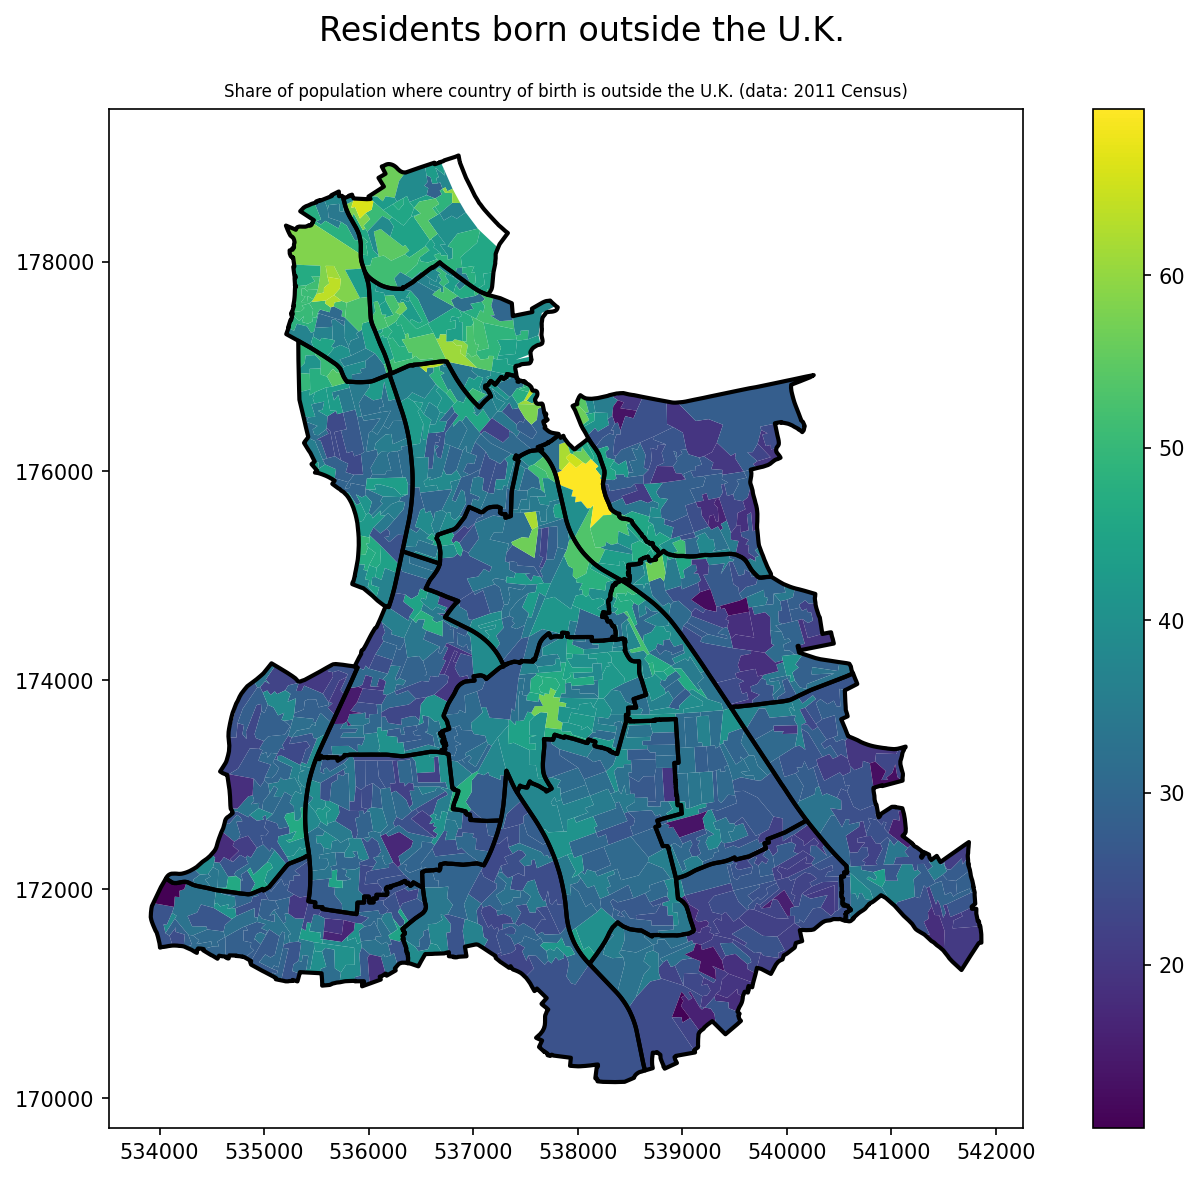

In [10]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('Residents born outside the U.K.', fontsize=16, y=.95)
plt.title('Share of population where country of birth is outside the U.K. (data: 2011 Census)', fontsize=8)
cob_oa_geom.plot(ax=ax, column='Non-UK origin', 
                 legend=True, 
                #  vmin=0, vmax=100
                 ) 
#oa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')
# plt.legend()

plt.savefig(f"{out_dir}/lbl_oa11_wd22_non-uk_origin.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_oa11_wd22_non-uk_origin.pdf")

In [11]:
# Plot
for region in ['Europe', 'Africa', 'Middle East and Asia',
               'The Americas and the Caribbean', 'Antarctica and Oceania']:
  fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
  plt.suptitle(f'Residents born in {region}', fontsize=16, y=.95)
  plt.title(f'Share of population where country of birth is in {region} (data: 2011 Census)', fontsize=8)
  cob_oa_geom.plot(ax=ax, column=region, 
                  legend=True) 
  wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')

  region_filename = region.replace(' ', '_').lower()
  plt.savefig(f"{out_dir}/lbl_oa11_wd22_{region_filename}.png", dpi=600)
  plt.savefig(f"{out_dir}/lbl_oa11_wd22_{region_filename}.pdf")

Output hidden; open in https://colab.research.google.com to view.

Country of Birth at Ward level
==
Basic plot, wards only
--

In [ ]:
cob_wd = pd.read_csv(f"{cob_dir}/lbl_country_of_birth_groups_share_wd22.csv")
print(len(cob_wd))
cob_wd.columns

19


Index(['WD22CD_proposed', 'United Kingdom', 'Europe', 'Africa',
       'Middle East and Asia', 'The Americas and the Caribbean',
       'Antarctica and Oceania', 'Other'],
      dtype='object')

In [ ]:
# Assign Ward names -- we can take them from the WD22 boundaries data
wd22cd_nm = wd22.set_index('WD22CD_proposed').WD22NM_proposed.to_dict()
cob_wd['WD22NM_proposed'] = cob_wd.WD22CD_proposed.map(lambda ward: wd22cd_nm[ward])

In [ ]:
# Derivative to simplify the presentation.
data = cob_wd.set_index('WD22NM_proposed')[cob_wd.columns[1:-1]].copy()
data.head()

,United Kingdom,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Other
WD22NM_proposed,,,,,,,
Bellingham,70.941940,7.518585,9.918133,4.629717,6.464665,0.508140,0.018820
Blackheath,69.750386,10.936696,6.890118,6.060216,4.953680,1.338137,0.070767
Brockley,63.694460,12.732863,8.217279,6.631700,7.198408,1.452945,0.072346
Catford South,67.851152,9.405479,7.206312,6.920544,8.256197,0.285768,0.074548
Crofton Park,69.920332,10.919194,6.279708,4.773382,6.909018,1.164893,0.033474


Text(0.5, 0, '%')

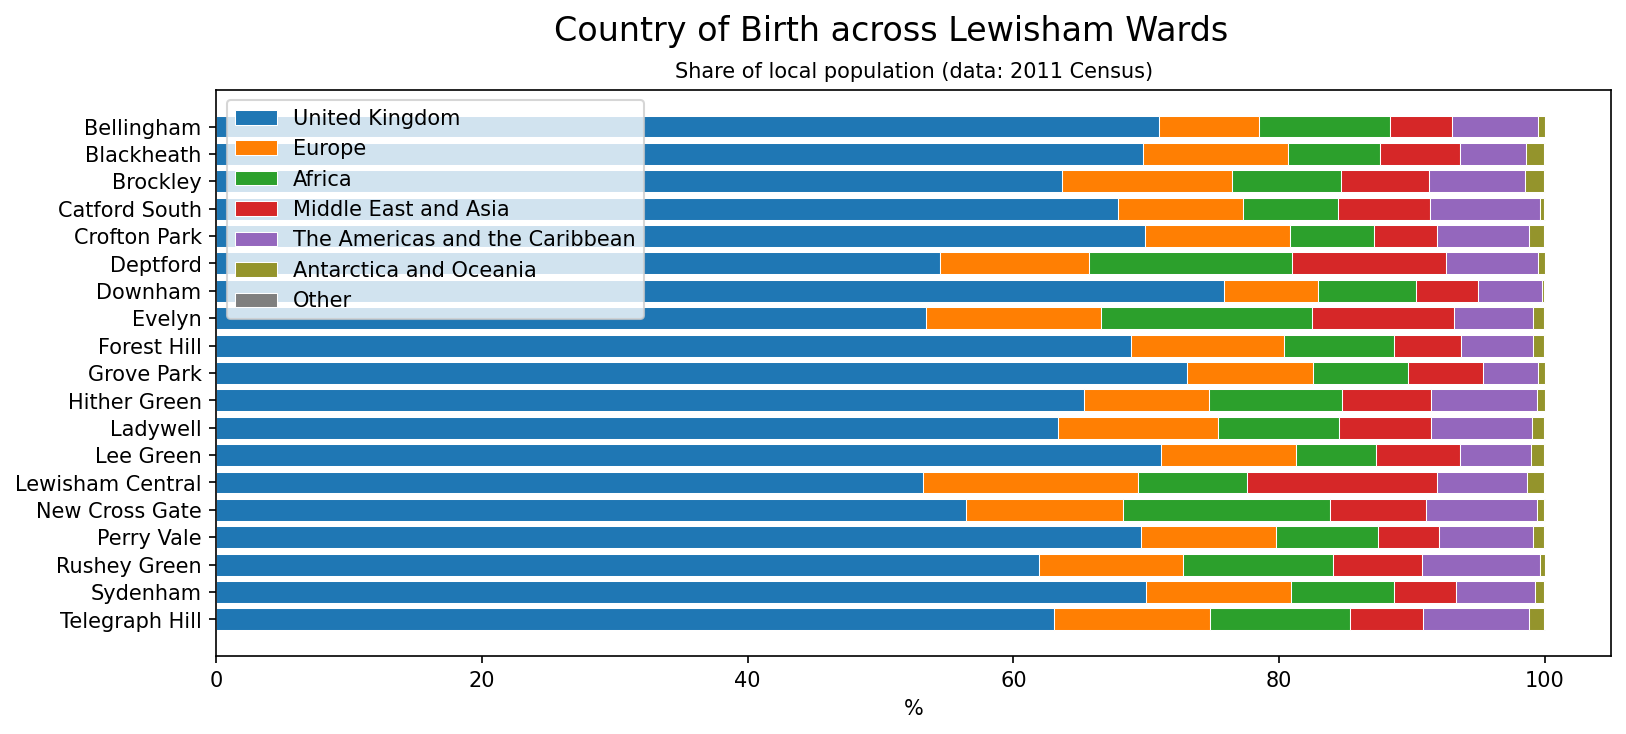

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(12, 5), dpi=150)

plt.suptitle('Country of Birth across Lewisham Wards', fontsize=16)
plt.title('Share of local population (data: 2011 Census)', fontsize=10)

ward_names = list(reversed(data.index)) 
variable_names = data.columns

base = pd.Series(index=ward_names, data=[0]*len(ward_names))

colors = [
  '#1f77b4', # blue
  '#ff7f03', # orange
  '#2ca02c', # green
  '#d62728', # red
  '#9467bd', # purple
  '#94942c', # yellow
  '#7f7f7f', # gray
]

for idx, var in enumerate(variable_names):
  values = data[var].loc[ward_names].values
  plt.barh(y=range(len(values)),
           width=values,
           height=0.8,
           left=base.values, 
           edgecolor='white', linewidth=0.5,
           color=colors[idx],
           label=var)
  base = base + values

plt.legend(loc='upper left')

plt.yticks(range(len(ward_names)), ward_names)

plt.xlabel('%')


With references
--

In [ ]:
cob_ref = pd.read_csv(f"{cob_dir}/references_country_of_birth_groups_share.csv").set_index('Name')
cob_ref

,United Kingdom,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Other
Name,,,,,,,
England,86.159594,4.999485,2.434543,4.770835,1.250821,0.338034,0.046687
London,63.319236,12.178801,7.604814,11.830156,3.991710,1.035743,0.039540
Lewisham,66.259130,10.648640,9.162151,6.432753,6.692644,0.765174,0.039509


In [ ]:
data_ref = data.\
  append(pd.Series(name='')).\
  append(cob_ref.iloc[::-1]) # in reverse order
data_ref

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,United Kingdom,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Other
Bellingham,70.941940,7.518585,9.918133,4.629717,6.464665,0.508140,0.018820
Blackheath,69.750386,10.936696,6.890118,6.060216,4.953680,1.338137,0.070767
Brockley,63.694460,12.732863,8.217279,6.631700,7.198408,1.452945,0.072346
Catford South,67.851152,9.405479,7.206312,6.920544,8.256197,0.285768,0.074548
Crofton Park,69.920332,10.919194,6.279708,4.773382,6.909018,1.164893,0.033474
Deptford,54.477149,11.194596,15.302957,11.580616,6.962156,0.468739,0.013786
Downham,75.832591,7.070347,7.420600,4.677946,4.761057,0.195904,0.041555
Evelyn,53.402950,13.199597,15.910965,10.689750,5.926537,0.842722,0.027480
Forest Hill,68.850141,11.532247,8.240205,5.103003,5.365558,0.881917,0.026929
Grove Park,73.081031,9.437992,7.208650,5.653451,4.138299,0.460553,0.020024


Text(0.5, 0, '%')

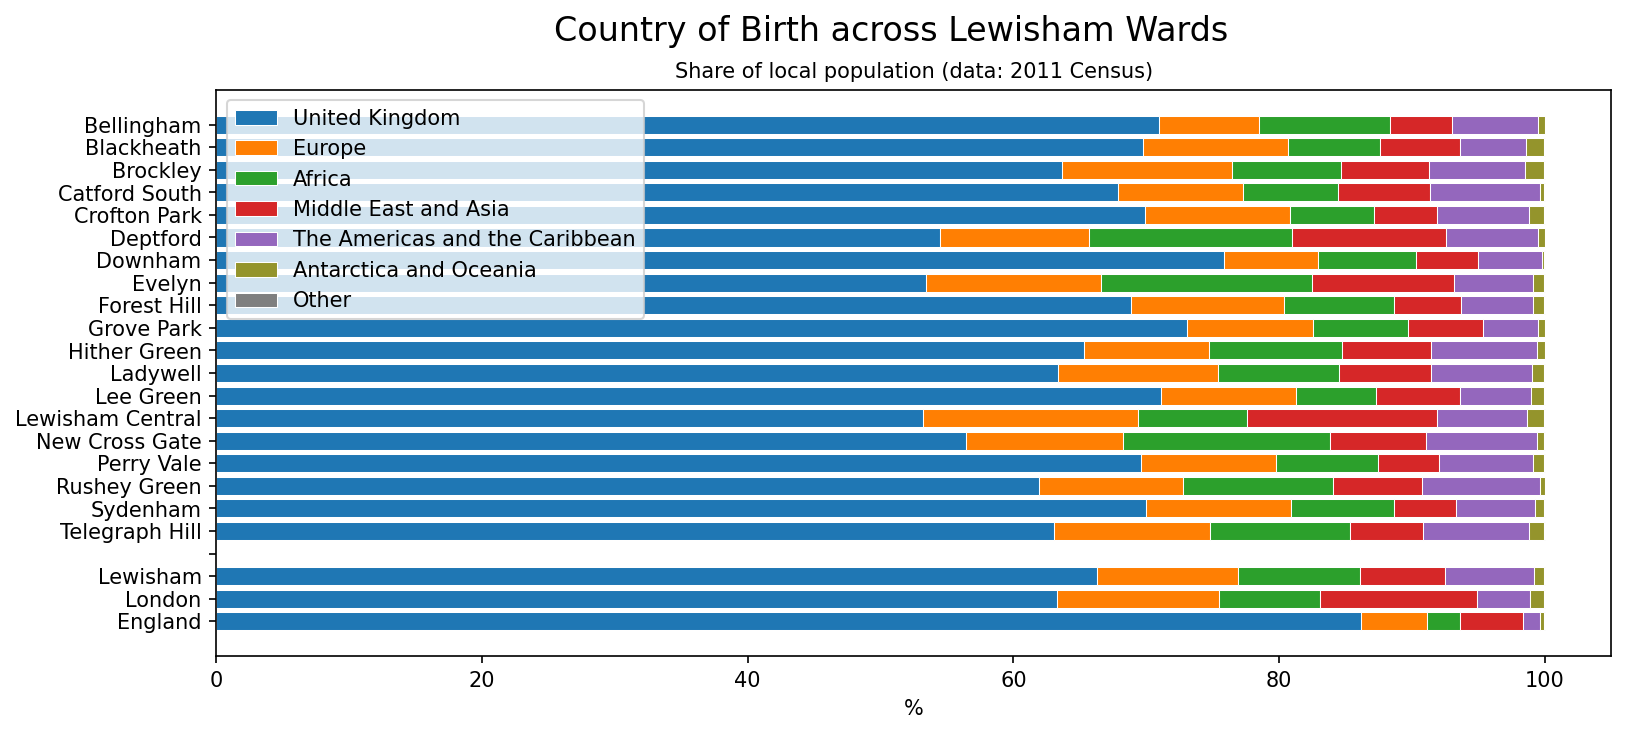

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5), dpi=150)

plt.suptitle('Country of Birth across Lewisham Wards', fontsize=16)
plt.title('Share of local population (data: 2011 Census)', fontsize=10)

ward_names = list(reversed(data_ref.index)) 
variable_names = data_ref.columns

base = pd.Series(index=ward_names, data=[0]*len(ward_names))

colors = [
  '#1f77b4', # blue
  '#ff7f03', # orange
  '#2ca02c', # green
  '#d62728', # red
  '#9467bd', # purple
  '#94942c', # yellow
  '#7f7f7f', # gray
]

for idx, var in enumerate(variable_names):
  values = data_ref[var].loc[ward_names].values
  plt.barh(y=range(len(values)),
           width=values,
           height=0.8,
           left=base.values, 
           edgecolor='white', linewidth=0.5,
           color=colors[idx],
           label=var)
  base = base + values

plt.legend(loc='upper left')

plt.yticks(range(len(ward_names)), ward_names)

plt.xlabel('%')


All countries of birth
==

Full
--

In [ ]:
cob_wd = pd.read_csv(f"{cob_dir}/lbl_country_of_birth_share_wd22.csv")
print(len(cob_wd))
cob_wd.columns

19


Index(['WD22CD_proposed', 'Europe: Total', 'Europe: United Kingdom: Total',
       'Europe: United Kingdom: England',
       'Europe: United Kingdom: Northern Ireland',
       'Europe: United Kingdom: Scotland', 'Europe: United Kingdom: Wales',
       'Europe: Great Britain not otherwise specified',
       'Europe: United Kingdom not otherwise specified', 'Europe: Guernsey',
       'Europe: Jersey', 'Europe: Channel Islands not otherwise specified',
       'Europe: Isle of Man', 'Europe: Ireland', 'Europe: Other Europe: Total',
       'Europe: Other Europe: EU Countries: Total',
       'Europe: Other Europe: EU countries: Member countries in March 2001: Total',
       'Europe: Other Europe: EU countries: Member countries in March 2001: France',
       'Europe: Other Europe: EU countries: Member countries in March 2001: Germany',
       'Europe: Other Europe: EU countries: Member countries in March 2001: Italy',
       'Europe: Other Europe: EU countries: Member countries in March 2001:

In [ ]:
# Assign Ward names -- we can take them from the WD22 boundaries data
wd22cd_nm = wd22.set_index('WD22CD_proposed').WD22NM_proposed.to_dict()
cob_wd['WD22NM_proposed'] = cob_wd.WD22CD_proposed.map(lambda ward: wd22cd_nm[ward])

Text(444.58333333333337, 0.5, '')

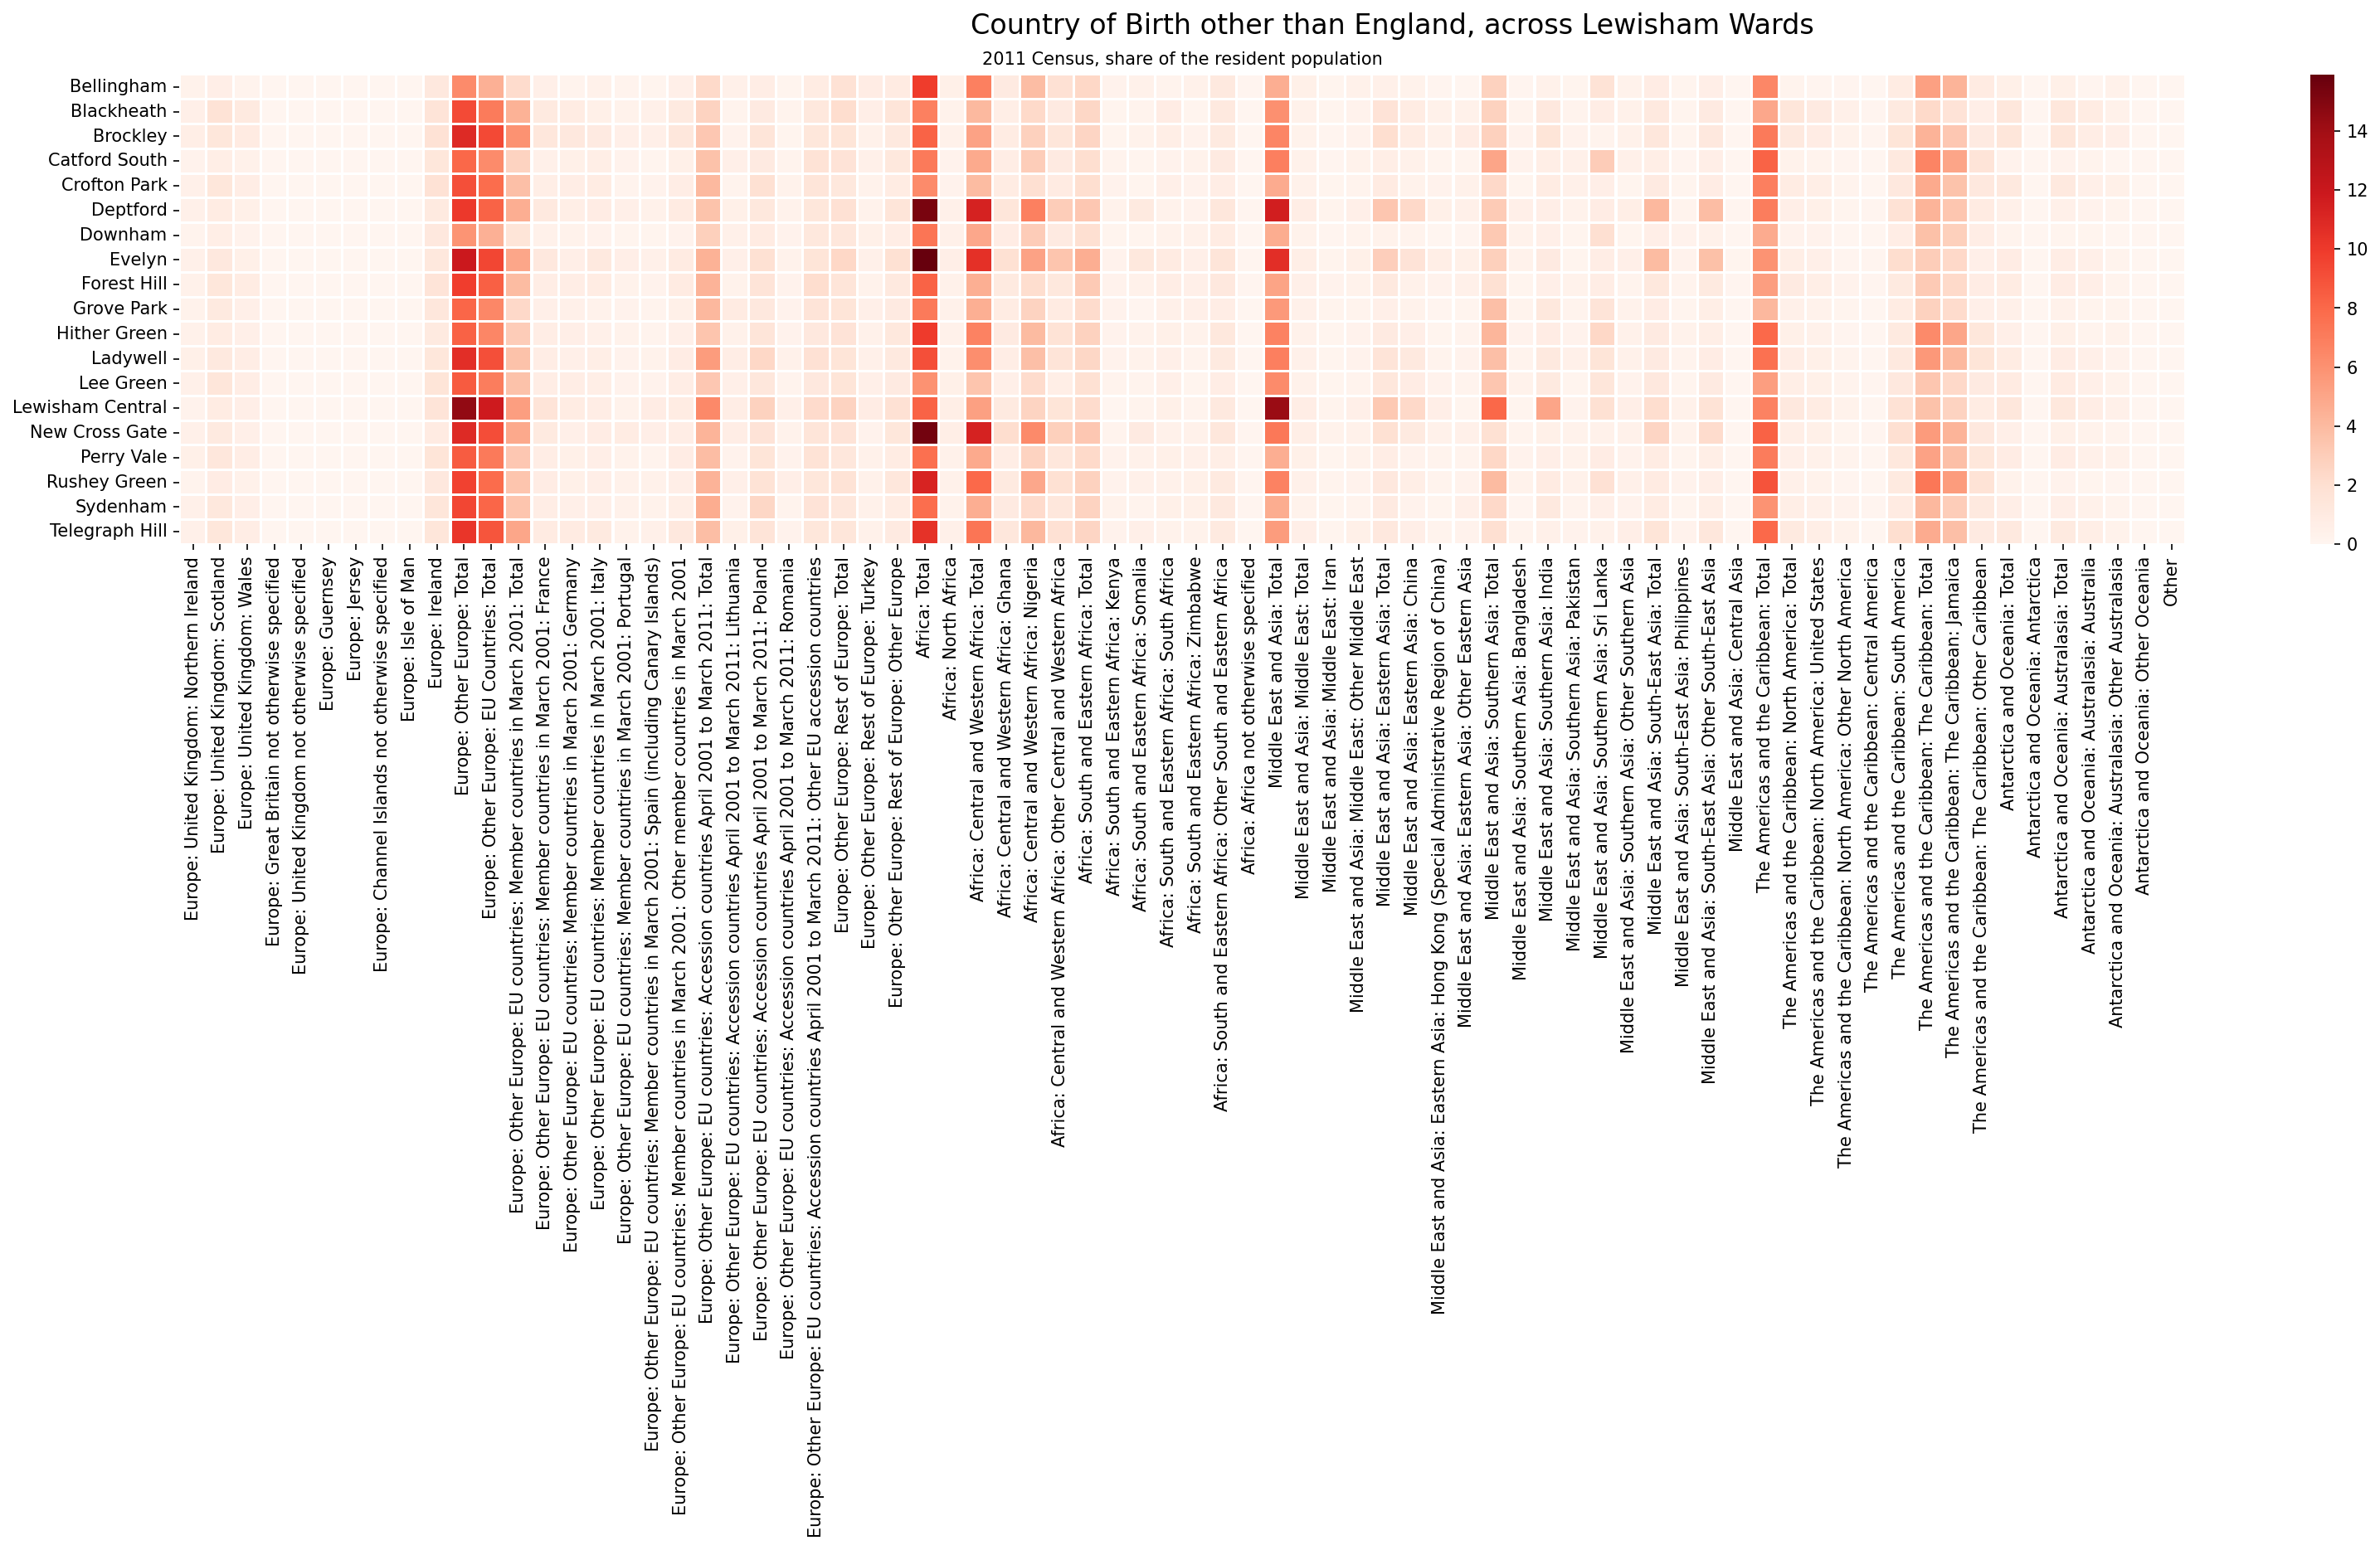

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(26, 5), dpi=150)

plt.suptitle('Country of Birth other than England, across Lewisham Wards', fontsize=16)
plt.title('2011 Census, share of the resident population', fontsize=10)

d = cob_wd.set_index('WD22NM_proposed')
data = d.copy()[d.columns[1:]]

ward_names = list(data.index) 
variable_names = data.columns[3:] # exclude Europe total, UK total, England 

sns.heatmap(data[variable_names].loc[ward_names], linewidth=1 , annot=False, cmap='Reds')
plt.xticks(rotation=90)
plt.ylabel('')